In [12]:
%pip install kaggle
import os
import kaggle
import zipfile



Note: you may need to restart the kernel to use updated packages.


In [13]:
import os
print(os.getcwd())

c:\Users\alire\Desktop\AI_Dataset_Annotator\notebooks


# Downloading the Dataset

In [27]:
import kaggle
import os
import zipfile
from tqdm import tqdm

# --- Download Section ---
data_dir = '../data'
dataset_name = 'alessiocorrado99/animals10'
zip_path = os.path.join(data_dir, 'animals10.zip')

print("Downloading dataset...")
try:
    # quiet=False displays the progress bar (or errors)
    kaggle.api.dataset_download_files(dataset_name, path=data_dir, quiet=False, unzip=False) # unzip=False for safety
    print("API download process completed.")
except Exception as e:
    print(f"An error occurred while calling the Kaggle API: {e}")
    print("Please ensure the kaggle.json file is located at C:\\Users\\alire\\.kaggle\\ and you have restarted the kernel.")

# --- Verification and Extraction Section ---

# Critical step: Check if the file was actually downloaded
if os.path.exists(zip_path):
    print(f"File {zip_path} found successfully.")
    print("Extracting files...")
    try:
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            # Use tqdm to display extraction progress bar
            for member in tqdm(zip_ref.infolist(), desc='Extracting '):
                zip_ref.extract(member, data_dir)
        print("Extraction completed.")
        
        # Delete the zip file after successful extraction
        os.remove(zip_path)
        print(f"File {zip_path} deleted.")
    except Exception as e:
        print(f"An error occurred during file extraction: {e}")
else:
    # If the file doesn't exist, provide a clear error message
    print(f"Error: File {zip_path} not found after download attempt.")
    print("Please check the download cell output for potential errors (e.g., 403 Forbidden).")

Dataset URL: https://www.kaggle.com/datasets/alessiocorrado99/animals10


KeyboardInterrupt: 

Found categories: 10 -> ['cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'ragno', 'scoiattolo']

Scanning image files...

DataFrame information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26179 entries, 0 to 26178
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   filepath      26179 non-null  object
 1   ground_truth  26179 non-null  object
dtypes: object(2)
memory usage: 409.2+ KB

Number of images per category:
ground_truth
cane          4863
ragno         4821
gallina       3098
cavallo       2623
farfalla      2112
mucca         1866
scoiattolo    1862
pecora        1820
gatto         1668
elefante      1446
Name: count, dtype: int64

Random samples from the DataFrame:


,filepath,ground_truth
16502,../data\raw-img\mucca\OIP-fRIOjDTpxwHgNX_5LwNX...,mucca
9917,../data\raw-img\farfalla\OIP-D_3OoMx_INqgoE-rj...,farfalla
494,../data\raw-img\cane\OIP-5JhbrzBOwcu_LtDJcwnCn...,cane
922,../data\raw-img\cane\OIP-aG1w0OIhwT_rtvmo9NNb_...,cane
9984,../data\raw-img\farfalla\OIP-fjqmmoKViMq4BVJ3T...,farfalla


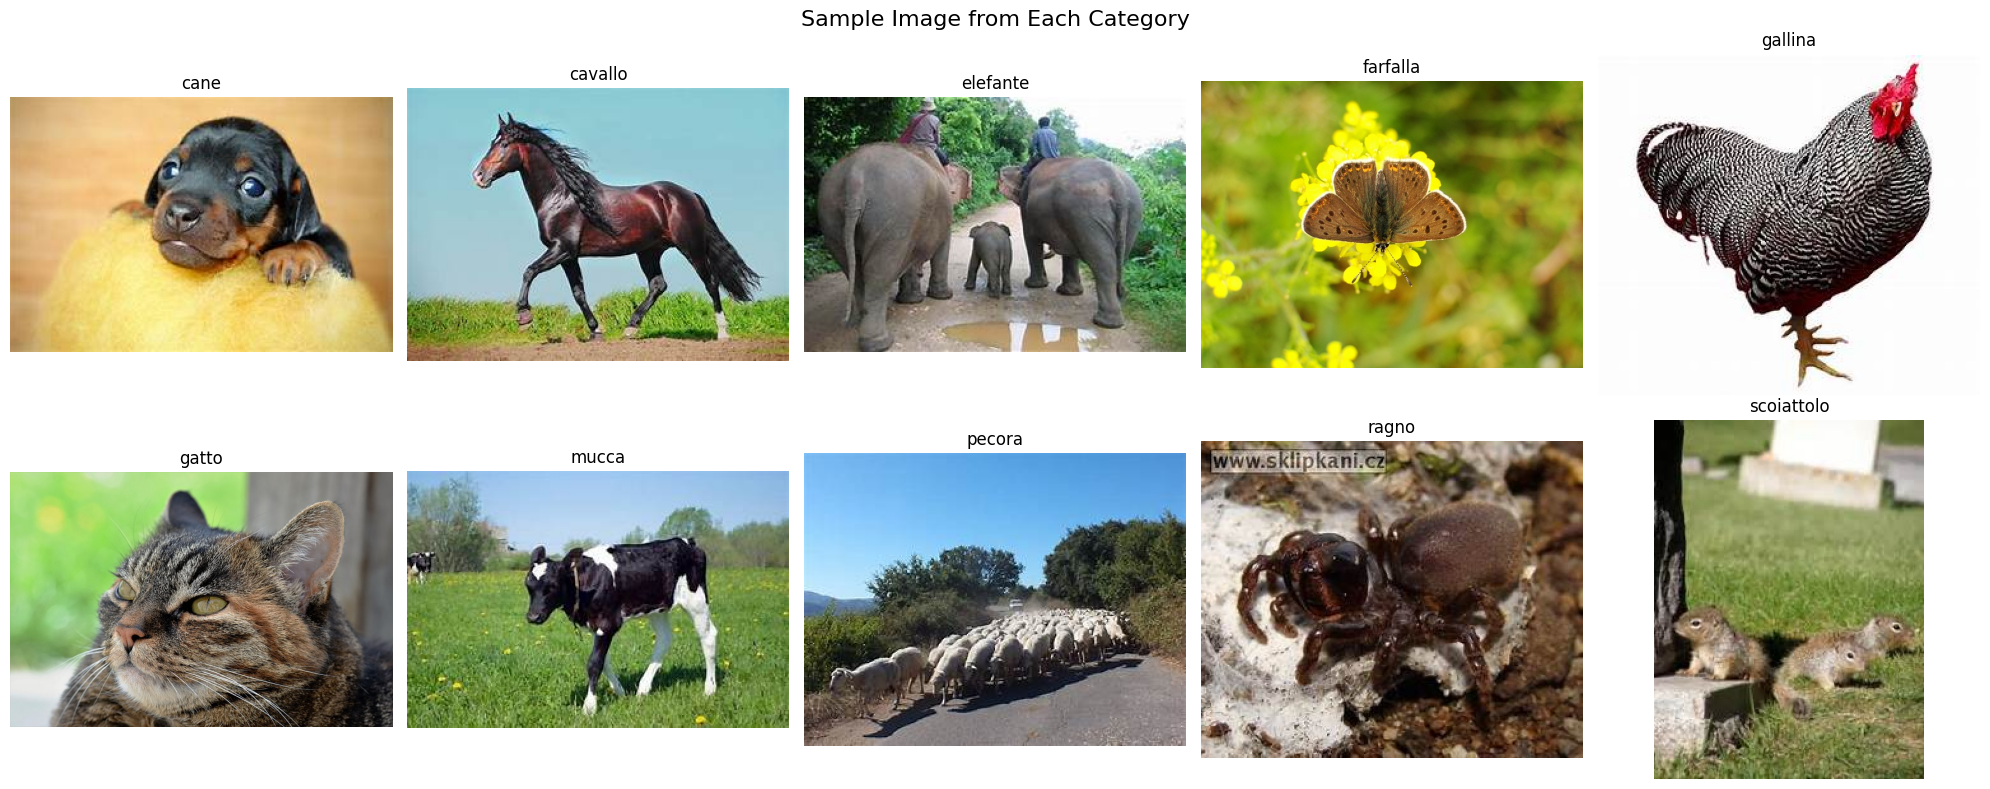

In [28]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import random

# --- Dataframe Preparation Section ---

# Base directory for images extracted in the previous cell
# The animals10 dataset typically includes a raw-img folder
images_base_dir = os.path.join(data_dir, 'raw-img')

# Check if the directory exists
if not os.path.isdir(images_base_dir):
    raise FileNotFoundError(
        f"Image folder not found at '{images_base_dir}'. "
        "Please ensure the dataset download and extraction cell ran correctly."
    )

# 1. Get the list of categories (which are the folder names)
categories = [d for d in os.listdir(images_base_dir) if os.path.isdir(os.path.join(images_base_dir, d))]
print(f"Found categories: {len(categories)} -> {categories}")

# 2. Build a complete list of file paths and their corresponding labels
image_paths = []
ground_truth_labels = []

print("\nScanning image files...")
for category in categories:
    category_path = os.path.join(images_base_dir, category)
    image_files = os.listdir(category_path)
    for image_file in image_files:
        # Ensure only image files are added
        if image_file.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_paths.append(os.path.join(category_path, image_file))
            ground_truth_labels.append(category)

# 3. Create a Pandas DataFrame
df = pd.DataFrame({
    'filepath': image_paths,
    'ground_truth': ground_truth_labels
})

# Display general DataFrame information
print("\nDataFrame information:")
df.info()

# Display the number of images per category
print("\nNumber of images per category:")
print(df['ground_truth'].value_counts())

# Display a few random samples from the DataFrame
print("\nRandom samples from the DataFrame:")
display(df.sample(5))

# --- Data Visualization Section ---

# Display a random image from each category
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
fig.suptitle('Sample Image from Each Category', fontsize=16)
axes = axes.flatten()

for i, category in enumerate(categories):
    # Select a random image from the current category
    sample_df = df[df['ground_truth'] == category].sample(1)
    image_path = sample_df['filepath'].iloc[0]
    
    # Read and display the image
    img = plt.imread(image_path)
    axes[i].imshow(img)
    axes[i].set_title(category)
    axes[i].axis('off')

plt.tight_layout()
plt.show()

# Dataframe Preparation

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import random

# --- Dataframe Preparation Section ---

# Base directory for images extracted in the previous cell
# The animals10 dataset typically includes a raw-img folder
images_base_dir = os.path.join(data_dir, 'raw-img')

# Check if the directory exists
if not os.path.isdir(images_base_dir):
    raise FileNotFoundError(
        f"Image folder not found at '{images_base_dir}'. "
        "Please ensure the dataset download and extraction cell ran correctly."
    )

# 1. Get the list of categories (which are the folder names)
categories = [d for d in os.listdir(images_base_dir) if os.path.isdir(os.path.join(images_base_dir, d))]
print(f"Found categories: {len(categories)} -> {categories}")

# 2. Build a complete list of file paths and their corresponding labels
image_paths = []
ground_truth_labels = []

print("\nScanning image files...")
for category in categories:
    category_path = os.path.join(images_base_dir, category)
    image_files = os.listdir(category_path)
    for image_file in image_files:
        # Ensure only image files are added
        if image_file.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_paths.append(os.path.join(category_path, image_file))
            ground_truth_labels.append(category)

# 3. Create a Pandas DataFrame
df = pd.DataFrame({
    'filepath': image_paths,
    'ground_truth': ground_truth_labels
})

# Display general DataFrame information
print("\nDataFrame information:")
df.info()

# Display the number of images per category
print("\nNumber of images per category:")
print(df['ground_truth'].value_counts())

# Display a few random samples from the DataFrame
print("\nRandom samples from the DataFrame:")
display(df.sample(5))

# --- Data Visualization Section ---

# Display a random image from each category
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
fig.suptitle('Sample Image from Each Category', fontsize=16)
axes = axes.flatten()

for i, category in enumerate(categories):
    # Select a random image from the current category
    sample_df = df[df['ground_truth'] == category].sample(1)
    image_path = sample_df['filepath'].iloc[0]
    
    # Read and display the image
    img = plt.imread(image_path)
    axes[i].imshow(img)
    axes[i].set_title(category)
    axes[i].axis('off')

plt.tight_layout()
plt.show()

# Weak Labeling

In [ ]:
from tqdm import tqdm
import time

# --- First, test on a small sample ---
sample_size = 100  # Start by testing with 100 images
df_sample = df.sample(sample_size)

weak_labels = []

# Use tqdm to display a progress bar
for index, row in tqdm(df_sample.iterrows(), total=len(df_sample), desc="Labeling samples"):
    image_path = row['filepath']
    
    try:
        img = Image.open(image_path)
        
        # Send request to Gemini (same code as before)
        response = model.generate_content([prompt, img])
        
        # Clean and add the label to the list
        label = response.text.strip().lower()
        weak_labels.append(label)
        
    except Exception as e:
        print(f"Error processing image {os.path.basename(image_path)}: {e}")
        # If an error occurs, append None to keep rows aligned
        weak_labels.append(None)
    
    # Short pause between requests to avoid rate limit errors
    time.sleep(1) # Wait 1 second

# Add the list of weak labels as a new column to the sample DataFrame
df_sample['weak_label'] = weak_labels

print("\n--- Sample Labeling Results ---")
# Display 5 sample results with ground truth and weak labels
display(df_sample.head())

# Check how many labels were correctly generated
correct_predictions = (df_sample['ground_truth'] == df_sample['weak_label']).sum()
accuracy = (correct_predictions / len(df_sample)) * 100
print(f"\nInitial accuracy on {sample_size} samples: {accuracy:.2f}%")

## Simulating Labeled Dataset

In [ ]:
import numpy as np
import pandas as pd

print("Simulating labeled dataset...")

# Create a copy of the main DataFrame
df_labeled = df.copy()

# Create the weak_label column by copying the ground truth labels
df_labeled['weak_label'] = df_labeled['ground_truth']

# --- Simulate AI errors ---
# Randomly corrupt 20% of the labels
error_rate = 0.20
num_errors = int(len(df_labeled) * error_rate)

# Select random indices for introducing errors
error_indices = np.random.choice(df_labeled.index, size=num_errors, replace=False)

# List of all possible categories
categories = df_labeled['ground_truth'].unique().tolist()

# For each error index, replace with a random incorrect label
for idx in error_indices:
    original_label = df_labeled.loc[idx, 'ground_truth']
    # List of possible incorrect labels (all except the original label)
    possible_wrong_labels = [c for c in categories if c != original_label]
    # Randomly select an incorrect label
    wrong_label = np.random.choice(possible_wrong_labels)
    # Replace the label
    df_labeled.loc[idx, 'weak_label'] = wrong_label

print(f"{num_errors} labels were randomly corrupted.")

# Verify the simulation accuracy
accuracy = (df_labeled['ground_truth'] == df_labeled['weak_label']).sum() / len(df_labeled) * 100
print(f"Simulated AI engine accuracy: {accuracy:.2f}%")

# Save the DataFrame for use in later phases
output_path = '../data/labeled_dataset.csv'
df_labeled.to_csv(output_path, index=False)

print(f"\nSimulated DataFrame saved to: {output_path}")
print("Sample of the final DataFrame:")
# Display samples where errors exist to confirm the simulation worked
display(df_labeled[df_labeled['ground_truth'] != df_labeled['weak_label']].head())

## Simulating Confidence Scores

In [ ]:
import pandas as pd
import numpy as np

# Read the labeled dataset file
labeled_dataset_path = '../data/labeled_dataset.csv'
df_final = pd.read_csv(labeled_dataset_path)

# --- Simulate Confidence Scores ---
# Add a new column called 'confidence'

# For cases where the weak label is correct, generate a high confidence score (between 0.8 and 1.0)
correct_mask = df_final['ground_truth'] == df_final['weak_label']
df_final.loc[correct_mask, 'confidence'] = np.random.uniform(0.8, 1.0, size=correct_mask.sum())

# For cases where the weak label is incorrect, generate a low confidence score (between 0.2 and 0.6)
incorrect_mask = ~correct_mask
df_final.loc[incorrect_mask, 'confidence'] = np.random.uniform(0.2, 0.6, size=incorrect_mask.sum())

print("The 'confidence' column was successfully simulated and added.")

# Save the final DataFrame with the new column
final_dataset_path = '../data/final_dataset_with_confidence.csv'
df_final.to_csv(final_dataset_path, index=False)

print(f"The final DataFrame was saved to: {final_dataset_path}")
display(df_final.head())